In [161]:
import sys 

import os 
import random

import numpy as np 
import pandas as pd 

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

plt.style.use('ggplot')

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [163]:
file_dir = ''

In [164]:
mejores_clientes = pd.read_csv(file_dir + '10000clientes.csv')

In [165]:
mejores_clientes.head()

,pk_cid,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,region_code,salary,age,gender
0,1517456,161,6,910.0,1,4,1,141,28.0,113652.32033,37.000000,2.0
1,1512063,178,6,900.0,1,4,1,141,8.0,113652.32033,32.833333,2.0
2,1515010,169,6,900.0,1,4,1,141,28.0,113652.32033,31.000000,1.0
3,1520203,148,6,840.0,1,4,1,141,8.0,113652.32033,34.500000,1.0
4,1518210,157,6,810.0,1,4,1,141,28.0,113652.32033,65.000000,2.0


In [166]:
mejores_clientes["salary"] = mejores_clientes["salary"].astype(int)

In [167]:
mejores_clientes["age"] = mejores_clientes["age"].astype(int)

In [168]:
mejores_clientes["gender"] = mejores_clientes["gender"].astype(int)

In [169]:
mejores_clientes["region_code"] = mejores_clientes["region_code"].astype(int)

In [170]:
mejores_clientes.head()

,pk_cid,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,region_code,salary,age,gender
0,1517456,161,6,910.0,1,4,1,141,28,113652,37,2
1,1512063,178,6,900.0,1,4,1,141,8,113652,32,2
2,1515010,169,6,900.0,1,4,1,141,28,113652,31,1
3,1520203,148,6,840.0,1,4,1,141,8,113652,34,1
4,1518210,157,6,810.0,1,4,1,141,28,113652,65,2


In [171]:
mejores_clientes['recency1'] = pd.qcut(mejores_clientes['recency'], q=5, labels=range(5))
mejores_clientes['monetary_value1'] = pd.qcut(mejores_clientes['monetary_value'], q=5, labels=range(5))
mejores_clientes['frequency1'] = (mejores_clientes['frequency'] > 1).astype(int)

In [172]:
mejores_clientes.head(2).T

,0,1
pk_cid,1517456,1512063
recency,161,178
frequency,6,6
monetary_value,910,900
r_quartile,1,1
f_quartile,4,4
m_quartile,1,1
RFMScore,141,141
region_code,28,8
salary,113652,113652


In [173]:
mejores_clientes.pivot_table(index='recency1', values=['recency'], aggfunc=[len, np.mean])

,len,mean
,recency,recency
recency1,,
0,2059,98.865954
1,1950,147.173333
2,1978,303.748231
3,2041,423.597746
4,1944,485.171811


In [174]:
mejores_clientes.pivot_table(index='monetary_value1', values=['monetary_value'], aggfunc=[len, np.mean])

,len,mean
,monetary_value,monetary_value
monetary_value1,,
0,2088.0,170.426245
1,1915.0,289.848564
2,2073.0,650.631934
3,1902.0,868.590957
4,1994.0,1329.317954


In [175]:
mejores_clientes.pivot_table(index='frequency1', values=['frequency'], aggfunc=[len, np.mean])

,len,mean
,frequency,frequency
frequency1,,
0,5,1.000000
1,9967,10.035718


In [176]:
rm_df = pd.crosstab(mejores_clientes['recency1'], mejores_clientes['monetary_value1'])

In [177]:
rm_df

monetary_value1,0,1,2,3,4
recency1,,,,,
0,1475,512,72,0,0
1,508,1155,283,4,0
2,105,248,754,544,327
3,0,0,547,849,645
4,0,0,417,505,1022


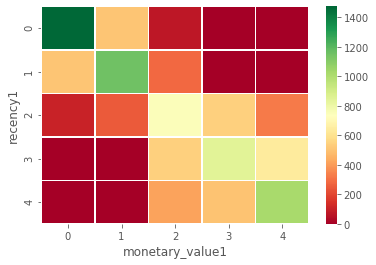

In [178]:
sns.heatmap(rm_df, cmap='RdYlGn', linewidths=0.5)

In [179]:
mejores_clientes_demographic = ['salary','age','gender']

In [180]:
mejores_clientes_demographic1 = mejores_clientes[mejores_clientes_demographic]

In [181]:
mejores_clientes_demographic1.head()

,salary,age,gender
0,113652,37,2
1,113652,32,2
2,113652,31,1
3,113652,34,1
4,113652,65,2


C:\Users\jmlaplaud\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jmlaplaud\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


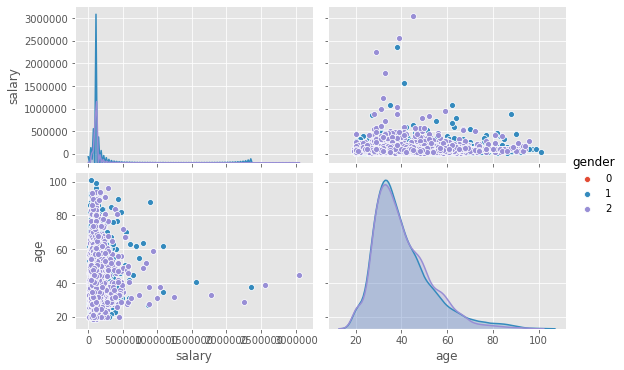

In [182]:
sns.pairplot(mejores_clientes_demographic1,hue='gender', aspect=1.5)
plt.show()

In [183]:
#aplicacion del algoritmo k-means para poder obtener el cluster de la personalizacion 

In [184]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=4))
        ]
)

In [185]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [186]:
pipe.fit(mejores_clientes[['salary', 'age', 'gender']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [187]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [188]:
mejores_clientes['Cluster'] = pipe.predict(mejores_clientes[['salary', 'age', 'gender']])

In [189]:
mejores_clientes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pk_cid           9972 non-null   int64   
 1   recency          9972 non-null   int64   
 2   frequency        9972 non-null   int64   
 3   monetary_value   9972 non-null   float64 
 4   r_quartile       9972 non-null   int64   
 5   f_quartile       9972 non-null   int64   
 6   m_quartile       9972 non-null   int64   
 7   RFMScore         9972 non-null   int64   
 8   region_code      9972 non-null   int32   
 9   salary           9972 non-null   int32   
 10  age              9972 non-null   int32   
 11  gender           9972 non-null   int32   
 12  recency1         9972 non-null   category
 13  monetary_value1  9972 non-null   category
 14  frequency1       9972 non-null   int32   
 15  Cluster          9972 non-null   int32   
dtypes: category(2), float64(1), int32(6), int6

In [190]:
mejores_clientes.head(2)

,pk_cid,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,region_code,salary,age,gender,recency1,monetary_value1,frequency1,Cluster
0,1517456,161,6,910.0,1,4,1,141,28,113652,37,2,1,3,1,2
1,1512063,178,6,900.0,1,4,1,141,8,113652,32,2,2,3,1,2


In [191]:
mejores_clientes.groupby('Cluster').agg({
    'salary': 'max',
    'age': 'mean',
    'gender':'max'
})

,salary,age,gender
Cluster,,,
0,686971,62.047438,2
1,645378,36.581444,1
2,619313,35.940878,2
3,3045715,43.619048,2


In [196]:
# debido a la aplicación del algoritmo podemos concluir que la mejor forma de poder segmentar las campañas sera: 

#3er modelo de campaña: Destinado al publico Femenino de salario hasta 65000 aproximadamente y 35 años promedio
#2do modelo de campaña: Destinado al publico  masculino de salario de hasta 65000 y 35 años promedio
#1er modelo de campaña: Destinado al publico de salario de hasta 65000 pero una edad promedio de 62 años
#0 modelo de campaña: destinado al publico de 43 años de promedio y un salario maximo de 304000 

In [193]:
mejores_clientes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pk_cid           9972 non-null   int64   
 1   recency          9972 non-null   int64   
 2   frequency        9972 non-null   int64   
 3   monetary_value   9972 non-null   float64 
 4   r_quartile       9972 non-null   int64   
 5   f_quartile       9972 non-null   int64   
 6   m_quartile       9972 non-null   int64   
 7   RFMScore         9972 non-null   int64   
 8   region_code      9972 non-null   int32   
 9   salary           9972 non-null   int32   
 10  age              9972 non-null   int32   
 11  gender           9972 non-null   int32   
 12  recency1         9972 non-null   category
 13  monetary_value1  9972 non-null   category
 14  frequency1       9972 non-null   int32   
 15  Cluster          9972 non-null   int32   
dtypes: category(2), float64(1), int32(6), int6

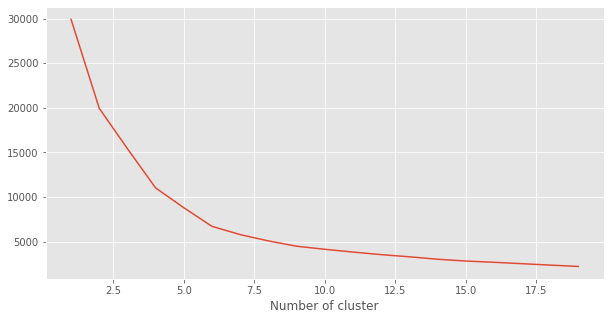

In [195]:
sse = {}

for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(mejores_clientes[['salary', 'age', 'gender']])
    mejores_clientes['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()